<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector).
3. Split X and y into train and test subsets.
4. Preprocess your data:

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix.
   
5. Create your network:
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`.
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four **"configurations"**:

1. Using a `tensorflow` network
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [71]:
import pandas as pd
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For visualization
np.random.seed(42)                  # Sets fixed random seed for reproducibility
from sklearn.model_selection import train_test_split
# Import Keras components
from tensorflow.keras.models import Sequential     # For creating sequential model
from tensorflow.keras.layers import Dense, Input, \
Dropout, Flatten, Conv2D, MaxPooling2D             # Core layers needed for CNN
from tensorflow.keras import utils                 # Utilities like to_categorical


In [72]:
# Load Kaggle Train data
data = pd.read_csv('./data/train.csv')

In [73]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = data
y = data['label']

In [75]:
X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Drop label colums 
X.drop(columns='label', inplace=True)

In [77]:
X.shape

(42000, 784)

In [78]:
#Split the datat using Train and Test
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [79]:
# Normalize the pixel values to range [0, 1]
X_train /= 255.0
X_test /= 255.0

In [80]:
X_train.shape

(33600, 784)

In [81]:
X_train.astype('float32')
X_test.astype('float32')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Reshape X_train for CNN (28x28 images with 1 channel)
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [83]:
X_train.shape

(33600, 28, 28, 1)

In [84]:
y_train[:10]

34941    6
24433    5
24432    3
8832     4
30291    7
28009    8
27876    6
120      7
30457    0
4634     9
Name: label, dtype: int64

In [85]:
# Convert labels to one-hot encoded format
# Transform single digit (0-9) into binary vector of length 10
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [86]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [87]:
y_train.shape

(33600, 10)

In [88]:
# Initial layers
model = Sequential([
   Input(shape=(28, 28, 1)),    # Input shape: 28x28 grayscale images (1 channel)
   Flatten()])                    # Flatten 2D image to 1D array (28*28*1 = 784 values)

# Add fully-connected (Dense) layers
model.add(Dense(256, activation='relu'))    # Hidden layer 1: 128 nodes, ReLU for non-linearity
model.add(Dense(128, activation='relu'))     # Hidden layer 2: 64 nodes, dimensionality reduction
model.add(Dense(10, activation='softmax'))  # Output layer: 10 nodes (digits 0-9)

In [89]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display network architecture and parameters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [91]:
history = model.fit(X_train,
                    y_train, 
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.5483 - val_accuracy: 0.9518 - val_loss: 0.1657
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1220 - val_accuracy: 0.9640 - val_loss: 0.1173
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0751 - val_accuracy: 0.9658 - val_loss: 0.1136
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9679 - val_loss: 0.1058
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9714 - val_loss: 0.1033


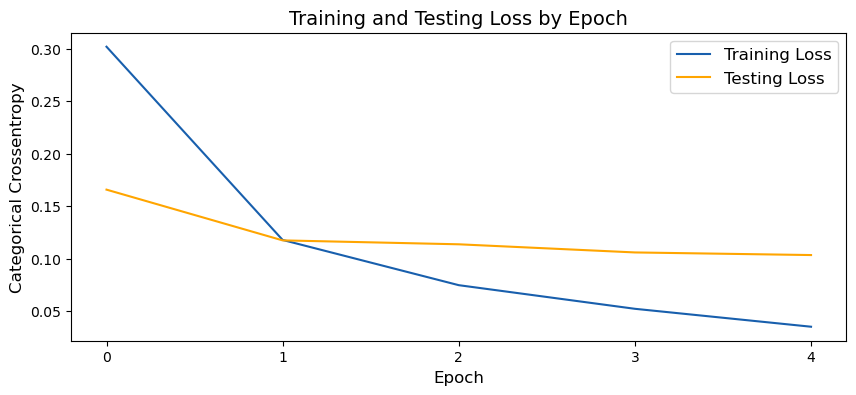

In [92]:
# Extract training and validation loss metrics from model history
train_loss = history.history['loss']          # Training loss per epoch
test_loss = history.history['val_loss']       # Validation loss per epoch
epoch_labels = history.epoch                  # List of epoch numbers

# Create visualization of loss over time
# Set figure dimensions (width=10, height=4)
plt.figure(figsize=(10, 4))                

# Plot loss curves
plt.plot(train_loss, label='Training Loss', color='#185fad')    # Blue line for training
plt.plot(test_loss, label='Testing Loss', color='orange')       # Orange line for testing

# Customize plot appearance
plt.title('Training and Testing Loss by Epoch', fontsize=14)    # Main title
plt.xlabel('Epoch', fontsize=12)                                # x-axis label
plt.ylabel('Categorical Crossentropy', fontsize=12)             # y-axis label (loss metric)
plt.xticks(epoch_labels, epoch_labels)                          # Set x-axis ticks to epoch numbers
plt.legend(fontsize=12);                                        # Add legend with labels

In [93]:
#Prediction
# Load Kaggle Test data
test_data = pd.read_csv('./data/test.csv')

In [94]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Testing the model
X_test_data = test_data
X_test_data /= 255.0
X_test_data.astype('float32')
X_test_data = X_test_data.values.reshape(-1, 28, 28, 1)


In [96]:
preds = model.predict(X_test_data)

875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


In [97]:
preds

array([[7.1453864e-11, 2.5121733e-11, 9.9999976e-01, ..., 2.2705153e-08,
        6.0470903e-08, 1.7665110e-10],
       [9.9995089e-01, 1.0942457e-08, 8.8781019e-07, ..., 1.4715047e-07,
        2.5987219e-07, 1.1481210e-06],
       [1.7653838e-07, 7.7436907e-06, 1.0498117e-05, ..., 4.2356183e-05,
        1.2277471e-04, 9.9717808e-01],
       ...,
       [3.5653427e-13, 6.7875670e-11, 9.4550878e-12, ..., 1.7701595e-11,
        1.8431007e-09, 1.2844225e-07],
       [2.1964553e-08, 2.7717222e-08, 2.3476204e-07, ..., 2.4815594e-05,
        7.9024375e-07, 9.9961752e-01],
       [2.8153166e-11, 3.3035097e-10, 9.9999845e-01, ..., 1.9018003e-09,
        1.7116390e-07, 5.5070393e-10]], dtype=float32)

In [98]:
predicted_labels = np.argmax(preds, axis=1)

In [99]:
predicted_labels.shape

(28000,)

In [100]:

submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),  
    'Label': predicted_labels  
})

# Save to CSV
submission.to_csv('./Data/submission.csv', index=False)